In [83]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from utils import data_loader
from utils.viewer import show_batch
from mnist_classifier import NeuralModel, train_model, test_model
from classifier_attacks import test_attack
import matplotlib.pyplot as plt

In [2]:
train_set, test_set = data_loader.get_data()
use_cuda = True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

batch_size = 512
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)


In [3]:
model = NeuralModel()

In [4]:
trained_model = train_model(model, train_loader, epochs =10)

started training ...
the loss after processing this batch is:  2.3372018337249756
the loss after processing this batch is:  2.3123111724853516
the loss after processing this batch is:  2.2923953533172607
the loss after processing this batch is:  2.280707597732544
the loss after processing this batch is:  2.2683937549591064
the loss after processing this batch is:  2.2526211738586426
the loss after processing this batch is:  2.2340281009674072
the loss after processing this batch is:  2.2257449626922607
the loss after processing this batch is:  2.203766345977783
the loss after processing this batch is:  2.2038886547088623
the loss after processing this batch is:  2.1875176429748535
the loss after processing this batch is:  2.1845247745513916
the loss after processing this batch is:  2.1632494926452637
the loss after processing this batch is:  2.160036325454712
the loss after processing this batch is:  2.1574926376342773
the loss after processing this batch is:  2.12638258934021
the loss

the loss after processing this batch is:  0.38035568594932556
the loss after processing this batch is:  0.34097549319267273
the loss after processing this batch is:  0.32844340801239014
the loss after processing this batch is:  0.2897290289402008
the loss after processing this batch is:  0.25072550773620605
the loss after processing this batch is:  0.28044575452804565
the loss after processing this batch is:  0.2850690186023712
the loss after processing this batch is:  0.2846626937389374
the loss after processing this batch is:  0.3234800398349762
the loss after processing this batch is:  0.3224123418331146
the loss after processing this batch is:  0.2543838918209076
the loss after processing this batch is:  0.324651300907135
the loss after processing this batch is:  0.3563988208770752
the loss after processing this batch is:  0.25054624676704407
the loss after processing this batch is:  0.27693766355514526
the loss after processing this batch is:  0.25418710708618164
the loss after pr

the loss after processing this batch is:  0.1721624881029129
the loss after processing this batch is:  0.09977913647890091
the loss after processing this batch is:  0.09507525712251663
the loss after processing this batch is:  0.12274494767189026
the loss after processing this batch is:  0.10887039452791214
the loss after processing this batch is:  0.1340479850769043
the loss after processing this batch is:  0.14669093489646912
the loss after processing this batch is:  0.09905613958835602
the loss after processing this batch is:  0.07218106836080551
the loss after processing this batch is:  0.1162741407752037
the loss after processing this batch is:  0.11285746097564697
the loss after processing this batch is:  0.08391967415809631
the loss after processing this batch is:  0.1286003589630127
the loss after processing this batch is:  0.10111009329557419
the loss after processing this batch is:  0.16837245225906372
the loss after processing this batch is:  0.1024240180850029
the loss afte

the loss after processing this batch is:  0.08198882639408112
the loss after processing this batch is:  0.10726984590291977
the loss after processing this batch is:  0.1400749683380127
the loss after processing this batch is:  0.11193318665027618
the loss after processing this batch is:  0.05854588747024536
the loss after processing this batch is:  0.09844769537448883
the loss after processing this batch is:  0.08320301026105881
the loss after processing this batch is:  0.0760824978351593
the loss after processing this batch is:  0.08316431194543839
the loss after processing this batch is:  0.07437556236982346
the loss after processing this batch is:  0.09906385838985443
the loss after processing this batch is:  0.12121575325727463
the loss after processing this batch is:  0.08178159594535828
the loss after processing this batch is:  0.1092573031783104
the loss after processing this batch is:  0.08456253260374069
the loss after processing this batch is:  0.08579646050930023
the loss af

the loss after processing this batch is:  0.06819843500852585
the loss after processing this batch is:  0.06418601423501968
the loss after processing this batch is:  0.05182713270187378
the loss after processing this batch is:  0.05404342710971832
the loss after processing this batch is:  0.07294003665447235
the loss after processing this batch is:  0.07832679897546768
the loss after processing this batch is:  0.05158597603440285
the loss after processing this batch is:  0.05182815343141556
the loss after processing this batch is:  0.07426171749830246
the loss after processing this batch is:  0.07429272681474686
the loss after processing this batch is:  0.0562046617269516
the loss after processing this batch is:  0.0598159022629261
the loss after processing this batch is:  0.09023765474557877
the loss after processing this batch is:  0.06379174441099167
the loss after processing this batch is:  0.07599599659442902
the loss after processing this batch is:  0.06508420407772064
the loss a

the loss after processing this batch is:  0.05020616203546524
the loss after processing this batch is:  0.04759428650140762
the loss after processing this batch is:  0.05753409117460251
the loss after processing this batch is:  0.05024711787700653
the loss after processing this batch is:  0.04734419286251068
the loss after processing this batch is:  0.0797235369682312
the loss after processing this batch is:  0.07396579533815384
the loss after processing this batch is:  0.06595370918512344
the loss after processing this batch is:  0.07874421775341034
the loss after processing this batch is:  0.048336368054151535
the loss after processing this batch is:  0.03365612030029297
the loss after processing this batch is:  0.0890112817287445
the loss after processing this batch is:  0.07879313826560974
the loss after processing this batch is:  0.052129242569208145
the loss after processing this batch is:  0.08359646052122116
the loss after processing this batch is:  0.04577971622347832
the loss

the loss after processing this batch is:  0.06918711215257645
the loss after processing this batch is:  0.032406020909547806
the loss after processing this batch is:  0.07992856949567795
the loss after processing this batch is:  0.04343882203102112
the loss after processing this batch is:  0.03772490471601486
the loss after processing this batch is:  0.03871235251426697
the loss after processing this batch is:  0.03795377165079117
the loss after processing this batch is:  0.04752441868185997
the loss after processing this batch is:  0.047650545835494995
the loss after processing this batch is:  0.050862252712249756
the loss after processing this batch is:  0.026390912011265755
the loss after processing this batch is:  0.04042942821979523
the loss after processing this batch is:  0.018825877457857132
the loss after processing this batch is:  0.014389201998710632
the loss after processing this batch is:  0.01933528482913971
the loss after processing this batch is:  0.08057070523500443
th

the loss after processing this batch is:  0.1334565132856369
the loss after processing this batch is:  0.056065093725919724
the loss after processing this batch is:  0.03999098017811775
the loss after processing this batch is:  0.05690499022603035
the loss after processing this batch is:  0.037171341478824615
the loss after processing this batch is:  0.035391829907894135
the loss after processing this batch is:  0.05667717009782791
the loss after processing this batch is:  0.02917245402932167
the loss after processing this batch is:  0.04246773570775986
the loss after processing this batch is:  0.0473385788500309
the loss after processing this batch is:  0.04694702476263046
the loss after processing this batch is:  0.04581490531563759
the loss after processing this batch is:  0.05671999603509903
the loss after processing this batch is:  0.04801388829946518
the loss after processing this batch is:  0.047226786613464355
the loss after processing this batch is:  0.05497225746512413
the lo

the loss after processing this batch is:  0.04412849247455597
the loss after processing this batch is:  0.04891763627529144
the loss after processing this batch is:  0.06278529018163681
the loss after processing this batch is:  0.0351397842168808
the loss after processing this batch is:  0.03311929106712341
the loss after processing this batch is:  0.04831481724977493
the loss after processing this batch is:  0.024927623569965363
the loss after processing this batch is:  0.03517838567495346
the loss after processing this batch is:  0.03590233996510506
the loss after processing this batch is:  0.04047829285264015
the loss after processing this batch is:  0.02878481149673462
the loss after processing this batch is:  0.034956254065036774
the loss after processing this batch is:  0.040436021983623505
the loss after processing this batch is:  0.023813212290406227
the loss after processing this batch is:  0.03348071500658989
the loss after processing this batch is:  0.03892857953906059
the l

In [30]:
def fgsm(model, X, y, epsilon):
    """ Construct FGSM adversarial examples on the examples X"""
    #delta = torch.zeros_like(X, requires_grad=True)
    #loss = nn.CrossEntropyLoss()(model(X + delta), y)
    X.requires_grad = True
    output = model(X)
    #output = F.log_softmax(output, dim=1)
    loss = F.nll_loss(output, y)

    loss.backward()
    #adv_noise = epsilon * delta.grad.detach().sign()
    adv_noise = epsilon * X.grad.detach().sign()
    return adv_noise

In [6]:
for X,y in test_loader:
    X,y = X.to(device), y.to(device)
    break
    
def plot_images(X,y,yp,M,N):
    f,ax = plt.subplots(M,N, sharex=True, sharey=True, figsize=(N,M*1.3))
    for i in range(M):
        for j in range(N):
            ax[i][j].imshow(1-X[i*N+j][0].detach().cpu().numpy(), cmap="gray")
            title = ax[i][j].set_title("Pred: {}".format(yp[i*N+j].max(dim=0)[1]))
            plt.setp(title, color=('g' if yp[i*N+j].max(dim=0)[1] == y[i*N+j] else 'r'))
            ax[i][j].set_axis_off()
    plt.tight_layout()

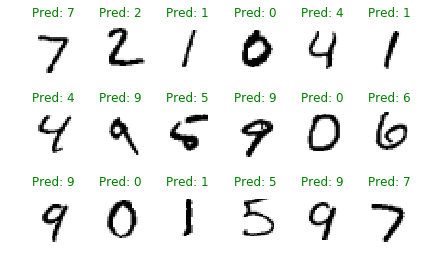

In [7]:
yp = trained_model(X)
plot_images(X, y, yp, 3, 6)

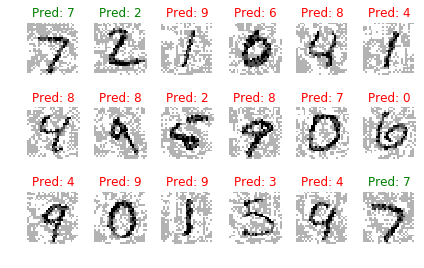

In [8]:
delta = fgsm(trained_model, X, y, 0.3)
perturbed = torch.clamp(X+delta, 0, 1)
yp = trained_model(perturbed)

plot_images(perturbed, y, yp, 3, 6)

In [9]:
def epoch_adversarial(model, loader, attack, *args):
    total_loss, total_err = 0.,0.
    for X,y in loader:
        X,y = X.to(device), y.to(device)
        delta = attack(model, X, y, *args)
        yp = model(X+delta)
        #yp = F.log_softmax(yp, dim=1)
        #loss = nn.CrossEntropyLoss()(yp,y)
        loss = F.nll_loss(yp, y)
        total_err += (yp.max(dim=1)[1] != y).sum().item()
        total_loss += loss.item() * X.shape[0]
    return 1-(total_err / len(loader.dataset)), total_loss / len(loader.dataset)

In [10]:
print("conv_net:", epoch_adversarial(trained_model, test_loader, fgsm, 0.3)[0])

conv_net: 0.07040000000000002


In [11]:
acc , examples =  test_attack(trained_model, device,test_loader, epsilon = 0.3)

Epsilon: 0.3	Test Accuracy = 1884 / 10000 = 0.1884


In [12]:
def pgd(model, X, y, epsilon, alpha, num_iter):
    """ Construct FGSM adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    for t in range(num_iter):
        loss = F.nll_loss(model(X + delta), y)
        loss.backward()
        delta.data = (delta + X.shape[0]*alpha*delta.grad.data).clamp(-epsilon,epsilon)
        delta.grad.zero_()
    return delta.detach()

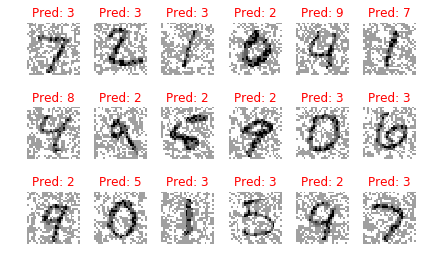

In [13]:
delta = pgd(trained_model, X, y, 0.3, 1e4, 1000)
yp = trained_model(X + delta)
plot_images(X+delta, y, yp, 3, 6)

In [14]:
print("conv_net:", epoch_adversarial(trained_model, test_loader, pgd, 0.3, 1e4, 50)[0])

conv_net: 0.06430000000000002


In [15]:
def norms(Z):
    """Compute norms over all but the first dimension"""
    return Z.view(Z.shape[0], -1).norm(dim=1)[:,None,None,None]


def pgd_l2(model, X, y, epsilon, alpha, num_iter):
    delta = torch.zeros_like(X, requires_grad=True)
    for t in range(num_iter):
        loss = F.nll_loss(model(X + delta), y)
        loss.backward()
        delta.data += alpha*delta.grad.detach() / norms(delta.grad.detach())
        delta.data = torch.min(torch.max(delta.detach(), -X), 1-X) # clip X+delta to [0,1]
        delta.data *= epsilon / norms(delta.detach()).clamp(min=epsilon)
        delta.grad.zero_()
        
    return delta.detach()

CNN: 0.05620000000000003


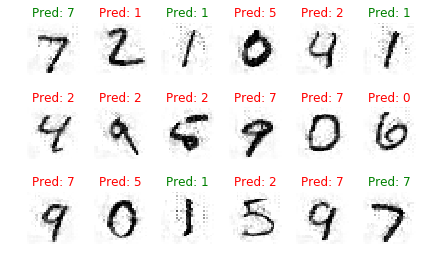

In [16]:
delta = pgd_l2(trained_model, X, y, epsilon=2, alpha=0.3, num_iter=40)
yp = trained_model(X + delta)
plot_images(X+delta, y, yp, 3, 6)
print("CNN:", epoch_adversarial(trained_model, test_loader, pgd_l2, 2, 0.3, 40)[0])

In [17]:
def pgd_linf(model, X, y, epsilon, alpha, num_iter):
    """ Construct FGSM adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    for t in range(num_iter):
        loss = F.nll_loss(model(X + delta), y)
        loss.backward()
        delta.data = (delta + alpha*delta.grad.detach().sign()).clamp(-epsilon,epsilon)
        delta.grad.zero_()
    return delta.detach()

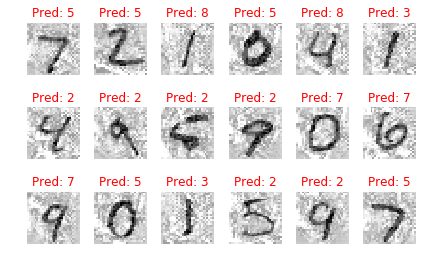

In [18]:
delta = pgd_linf(trained_model, X, y, epsilon=0.3, alpha=1e-2, num_iter=40)
yp = trained_model(X + delta)
plot_images(X+delta, y, yp, 3, 6)

In [19]:
print("CNN:", epoch_adversarial(trained_model, test_loader, pgd_linf, 0.3, 1e-2, 40)[0])

CNN: 0.0


In [20]:
fgsm.__name__ = "FGSM Attack"
pgd.__name__ = "Projected Gradient Attack"
pgd_l2.__name__="Deep Fool Attack"
pgd_linf.__name__="iFGSM Attack"

In [65]:
def attack(model, device, loader, attack_method, epsilon,*args ):

    print(attack_method.__name__+" : ")
    
    model.to(device)
    
    correct = 0
    total_loss = 0
    
    for batch in loader:
        
        batch_images, batch_labels = batch
        
        batch_images = batch_images.to(device)
        batch_labels = batch_labels.to(device)
        
        delta = attack_method(model, batch_images, batch_labels, epsilon, *args)
        predictions = model(batch_images+delta)

        loss = F.nll_loss(predictions, batch_labels)
        correct += (predictions.max(dim=1)[1] == batch_labels).sum().item()
        total_loss += loss.item() * batch_images.shape[0]
        
    accuracy = correct / len(loader.dataset)
    loss = total_loss / len(loader.dataset)
    
    return accuracy, loss 
        
    pass

In [66]:
def get_adv_examples(model, device, loader, attack_method, epsilon,*args ):
    
    adv_examples = []
    
    model.to(device)
    
    for batch in loader:
        
        batch_images, batch_labels = batch
        
        batch_images = batch_images.to(device)
        batch_labels = batch_labels.to(device)
        
        deltas = attack_method(model, batch_images, batch_labels, epsilon, *args)
        
        adv_images = torch.clamp(batch_images+deltas, 0, 1)
        
        adv_examples.append((batch_images, adv_images, batch_labels))
    
    return adv_examples
     

In [75]:
print(attack(trained_model, device, test_loader, fgsm, 0.3)[0])
print("=*"*20)

fgsm : 
0.0773
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*


In [76]:
print(attack(trained_model, device, test_loader, pgd, 0.3, 1e-2, 40)[0])
print("=*"*20)

Projected Gradient Attack : 
0.0583
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*


In [77]:
print(attack(trained_model, device, test_loader, pgd_linf, 0.1, 1e-3, 40)[0])
print("=*"*20)

iFGSM Attack : 
0.6522
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*


In [78]:
print(attack(trained_model, device, test_loader, pgd_l2, 2, 0.3, 40)[0])

Deep Fool Attack : 
0.0563


Deep Fool Attack : 
20


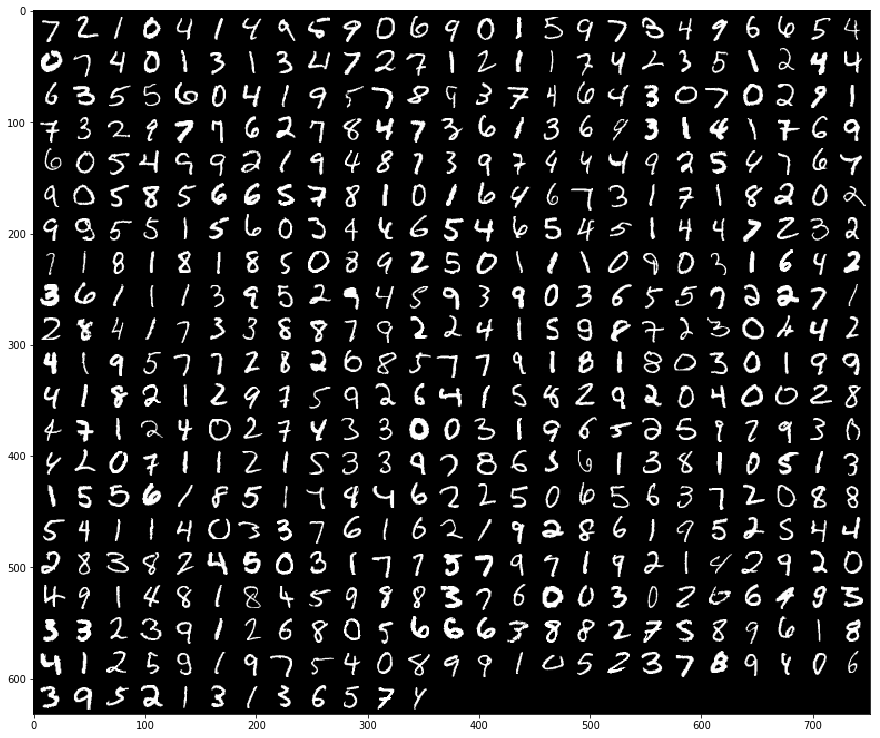

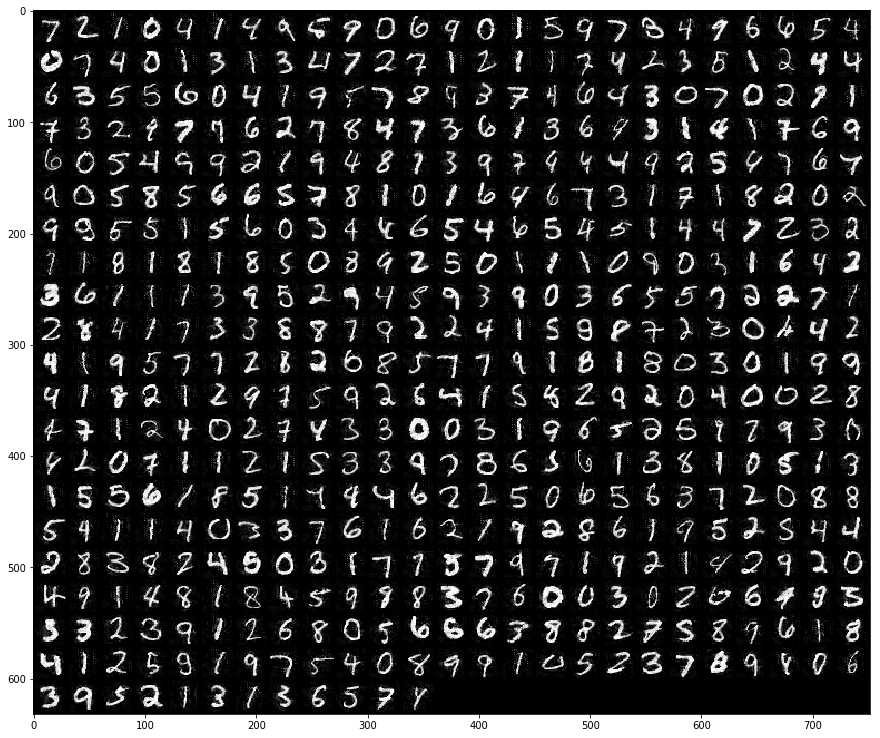

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1,
        7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5,
        1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1,
        0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0,
        3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1,
        5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
        9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4,
        1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2,

In [90]:
train_data = get_adv_examples(trained_model, device, test_loader, pgd_l2, 2, 0.3, 40)

print(len(train_data))

train_iter = iter(train_data)
a, b, c = next(train_iter)

show_batch(a.cpu())
show_batch(b.cpu())
print(c)
